<a href="https://colab.research.google.com/github/dvoils/neural-network-experiments/blob/main/hodgkin_huxley.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

The Hodgkin-Huxley model is a foundational biophysical model that explains how action potentials in neurons are initiated and propagated.


The main idea is that the neuron's cell membrane acts like a capacitor and has ion channels that behave like resistors through which different ions (e.g., Na⁺, K⁺, Cl⁻) flow. These movements create electrical currents that can be mathematically modeled.


## Overview

* Hodgkin and Huxley (1952) experimented on the **squid giant axon**.
* They identified three types of ion currents:

  * Sodium (Na⁺)
  * Potassium (K⁺)
  * A leak current (mostly Cl⁻ ions)

* Sodium and potassium have **voltage-dependent ion channels** (they open/close depending on membrane voltage).
* The **leak current** accounts for other ions that are always slightly passing through.


## The Electrical Analog of the Cell Membrane

  * **C** = membrane capacitance (stores charge)
  * **R** = resistance (ion channels)
  * **K**, **Na** = specific pathways (channels) for potassium and sodium ions

The idea is that **membrane potential behaves like a circuit**, where current can:

1. Charge the membrane (capacitor),
2. Flow through ion channels (resistors).


# Definition of the Model

* The membrane **separates intracellular from extracellular fluid** and behaves like a capacitor.
* When you inject a current $I(t)$:

  * Some goes to **charge the membrane** $I_{\text{cap}}(t)$
  * Some **leaks through ion channels** $I_k(t)$

So the total current:

$$
I(t) = I_{\text{cap}}(t) + \sum_k I_k(t)
$$

This equation is key. It’s **conservation of charge**: all current either goes into charging the membrane or leaks through ion channels.

where,

* $I(t)$: Total current applied
* $I_{\text{cap}}(t)$: Capacitive current = current used to change membrane voltage
* $I_k(t)$: Ionic currents through channels (e.g., sodium, potassium, leak)


---

# Ion Currents and Gating Variables

## Membrane Capacitor Equation

$$
C \frac{du}{dt} = - \sum_k I_k(t) + I(t)
$$

- $C$: Membrane capacitance  
- $u(t)$: Membrane potential (voltage across the membrane)  
- $I_k(t)$: Ionic current through each channel (sodium, potassium, leak)  
- $I(t)$: Injected (external) current  

### Interpretation:

This is just **Kirchhoff’s current law** applied to the membrane:

- The **change in membrane voltage** depends on **total incoming current** minus the **sum of ion channel currents**.
- Capacitor voltage changes according to net current flow.

## Total Ionic Current

$$
\sum_k I_k(t) = g_{\text{Na}} m^3 h (u - E_{\text{Na}}) + g_{\text{K}} n^4 (u - E_{\text{K}}) + g_l (u - E_l)
$$

Each term is in the form $g_{\text{ion}}(u - E_{\text{ion}})$, i.e., **conductance × driving force**:

- $g_{\text{Na}}$: Max conductance for sodium  
- $m^3 h$: Gating variables controlling how much Na⁺ can pass  
- $E_{\text{Na}}$: Reversal potential for Na⁺ (the voltage at which no net flow occurs)  
- $g_{\text{K}}$, $n^4$, $E_{\text{K}}$: Analogous terms for potassium  
- $g_l (u - E_l)$: Leak current (simple ohmic channel)

These three terms together give the **total ion current** out of the cell.

## Gating Variables

$$
\begin{aligned}
\frac{dm}{dt} &= \alpha_m(u)(1 - m) - \beta_m(u)m \\
\frac{dh}{dt} &= \alpha_h(u)(1 - h) - \beta_h(u)h \\
\frac{dn}{dt} &= \alpha_n(u)(1 - n) - \beta_n(u)n
\end{aligned}
$$

Each gating variable ($m$, $h$, $n$) is like a **probability** that a subunit of an ion channel is open.

- $\alpha$: Opening rate (depends on voltage $u$)  
- $\beta$: Closing rate (also depends on voltage)

They describe **how quickly and likely** the channels open or close over time.

## 🔍 Summary of Roles:

| Variable | Meaning               | Affects           |
|----------|-----------------------|-------------------|
| $m$      | Na⁺ activation gate   | Na⁺ conductance ↑ |
| $h$      | Na⁺ inactivation gate | Na⁺ conductance ↓ |
| $n$      | K⁺ activation gate    | K⁺ conductance ↑  |

> These combine nonlinearly (e.g., $m^3 h$, $n^4$) to reflect the real biophysics.



---

# Gating Variable Parameters

## Key Parameters

These are the constants used in the Hodgkin-Huxley equations.

## Reversal Potentials & Max Conductances

| Ion Channel | $E_x$ (mV) | $g_x$ (mS/cm²) |
| ----------- | ---------- | -------------- |
| Na          | +115       | 120            |
| K           | -12        | 36             |
| Leak (L)    | +10.6      | 0.3            |

- $E_x$: **Reversal potential** — the voltage at which there is no net current for ion $x$
- $g_x$: **Maximum conductance** for ion channel $x$

> These are key to calculating the ionic current:

$$
I_x = g_x \cdot \text{(gating variables)} \cdot (u - E_x)
$$

## Rate Functions $\alpha_x(u)$ and $\beta_x(u)$

These define how fast the gates open and close, depending on membrane voltage $u$.

| Variable $x$         | $\alpha_x(u)$                              | $\beta_x(u)$                   |
| -------------------- | ------------------------------------------ | ------------------------------ |
| n (K⁺ activation)    | $\dfrac{0.1(1 - 0.1u)}{\exp(1 - 0.1u) - 1}$ | $0.125 \exp(-u/80)$            |
| m (Na⁺ activation)   | $\dfrac{2.5 - 0.1u}{\exp(2.5 - 0.1u) - 1}$  | $4 \exp(-u/18)$                |
| h (Na⁺ inactivation) | $0.07 \exp(-u/20)$                         | $\dfrac{1}{\exp(3 - 0.1u) + 1}$ |

These are **empirically derived** voltage-dependent transition rates for each gate.

## Graphs

Shows two important functions for each gating variable ($m$, $h$, $n$):

#### (A) $x_0(u)$: Equilibrium value  
The steady-state value the gate variable $x$ would reach if the membrane potential were held constant.

- Think of it as: "What fraction of gates are open at a given voltage?"

#### (B) $\tau_x(u)$: Time constant  
Describes how fast the variable $x$ approaches its equilibrium $x_0(u)$.

- Smaller $\tau_x(u)$ → faster response to changes in voltage



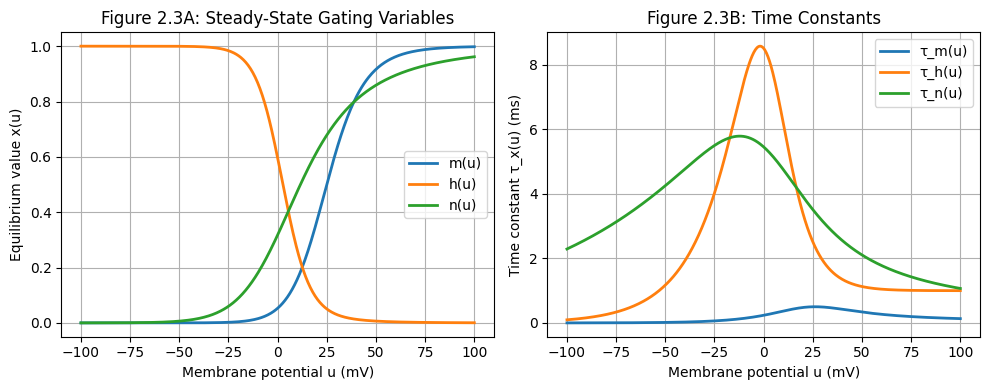

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Voltage range in mV
u = np.linspace(-100, 100, 500)

# Alpha and Beta functions from Table 2.1
def alpha_m(u):
    return (2.5 - 0.1 * u) / (np.exp(2.5 - 0.1 * u) - 1)

def beta_m(u):
    return 4 * np.exp(-u / 18)

def alpha_h(u):
    return 0.07 * np.exp(-u / 20)

def beta_h(u):
    return 1 / (np.exp(3 - 0.1 * u) + 1)

def alpha_n(u):
    return (0.1 - 0.01 * u) / (np.exp(1 - 0.1 * u) - 1)

def beta_n(u):
    return 0.125 * np.exp(-u / 80)

# Compute steady-state values x∞(u)
m_inf = alpha_m(u) / (alpha_m(u) + beta_m(u))
h_inf = alpha_h(u) / (alpha_h(u) + beta_h(u))
n_inf = alpha_n(u) / (alpha_n(u) + beta_n(u))

# Compute time constants τ_x(u)
tau_m = 1 / (alpha_m(u) + beta_m(u))
tau_h = 1 / (alpha_h(u) + beta_h(u))
tau_n = 1 / (alpha_n(u) + beta_n(u))

# Plotting x∞(u)
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(u, m_inf, label='m(u)', linewidth=2)
plt.plot(u, h_inf, label='h(u)', linewidth=2)
plt.plot(u, n_inf, label='n(u)', linewidth=2)
plt.xlabel('Membrane potential u (mV)')
plt.ylabel('Equilibrium value x(u)')
plt.title('Figure 2.3A: Steady-State Gating Variables')
plt.legend()
plt.grid(True)

# Plotting τ_x(u)
plt.subplot(1, 2, 2)
plt.plot(u, tau_m, label='τ_m(u)', linewidth=2)
plt.plot(u, tau_h, label='τ_h(u)', linewidth=2)
plt.plot(u, tau_n, label='τ_n(u)', linewidth=2)
plt.xlabel('Membrane potential u (mV)')
plt.ylabel('Time constant τ_x(u) (ms)')
plt.title('Figure 2.3B: Time Constants')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


## Reformulated Gating Dynamics

$$
\dot{x} = -\frac{1}{\tau_x(u)} (x - x_0(u))
$$

This is the standard form of a **first-order linear differential equation**, like a **low-pass filter**:

- $x$: Current state of the gating variable  
- $x_0(u)$: Steady-state value at voltage $u$  
- $\tau_x(u)$: Time constant, controlling how quickly $x$ relaxes to $x_0(u)$

## Interpretation

At any fixed membrane potential $u$, the gating variable $x$ will:

- **Approach its steady-state value** $x_0(u)$  
- **With a time constant** $\tau_x(u)$

> This formulation makes the system easier to simulate and understand numerically.



---

# Dynamics of the Hodgkin-Huxley Model

This section explains how the system responds to:

* **Pulse input**
* **Constant input**
* **Step input**
* **Time-dependent input**

The idea is to give you **intuition** for how the model behaves under biologically relevant conditions.




## Example: Spike Generation

* From **Figure 2.3A** (previous page), it’s stated that:

  * $m_0$ and $n_0$ **increase** with membrane voltage $u$
  * $h_0$ **decreases** with $u$

## Interpretation:

1. **If a current pulse increases the voltage**, more **Na⁺ channels open** (since $m$ rises).
2. This lets in **positive Na⁺ ions**, which **further depolarizes** the membrane.
3. **Positive feedback loop**: More Na⁺ entry → higher voltage → even more Na⁺ entry.
4. If strong enough → **action potential (spike)** is generated.

## But:

* The **$h$** gate (inactivation) acts slowly, **shutting off Na⁺** after a delay.
* The **$n$** gate lets **K⁺ out**, restoring the resting potential.
* This sequence causes the classic **spike + undershoot** behavior of action potentials.
* Spike amplitude is \~100 mV.

## Result:

* If the **current pulse is too small**, voltage decays back — no spike.
* **All-or-nothing threshold behavior**.



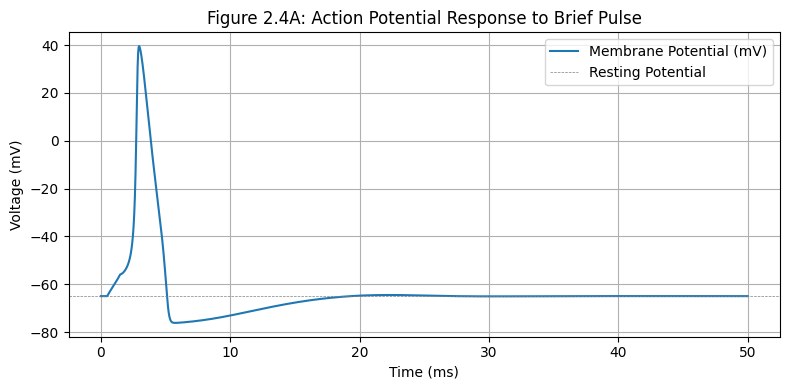

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Time parameters
dt = 0.01  # ms
T = 50.0   # total time in ms
time = np.arange(0, T, dt)

# Stimulus: brief pulse just before t=0
I_ext = np.zeros_like(time)
I_ext[(time >= 0.5) & (time < 1.5)] = 10  # strong pulse

# HH parameters from Table 2.1
g_Na = 120.0
g_K = 36.0
g_L = 0.3
E_Na = 115.0
E_K = -12.0
E_L = 10.6
C = 1.0

# Voltage shift so resting potential is at 0
def alpha_m(u): return (2.5 - 0.1 * u) / (np.exp(2.5 - 0.1 * u) - 1)
def beta_m(u): return 4 * np.exp(-u / 18)
def alpha_h(u): return 0.07 * np.exp(-u / 20)
def beta_h(u): return 1 / (np.exp(3 - 0.1 * u) + 1)
def alpha_n(u): return (0.1 - 0.01 * u) / (np.exp(1 - 0.1 * u) - 1)
def beta_n(u): return 0.125 * np.exp(-u / 80)

# Initialize variables
u = np.zeros_like(time)
m = np.zeros_like(time)
h = np.zeros_like(time)
n = np.zeros_like(time)

# Initial conditions at rest (u=0)
u[0] = 0.0
m[0] = alpha_m(u[0]) / (alpha_m(u[0]) + beta_m(u[0]))
h[0] = alpha_h(u[0]) / (alpha_h(u[0]) + beta_h(u[0]))
n[0] = alpha_n(u[0]) / (alpha_n(u[0]) + beta_n(u[0]))

# Euler integration
for i in range(1, len(time)):
    um = u[i-1]
    am, bm = alpha_m(um), beta_m(um)
    ah, bh = alpha_h(um), beta_h(um)
    an, bn = alpha_n(um), beta_n(um)

    m[i] = m[i-1] + dt * (am * (1 - m[i-1]) - bm * m[i-1])
    h[i] = h[i-1] + dt * (ah * (1 - h[i-1]) - bh * h[i-1])
    n[i] = n[i-1] + dt * (an * (1 - n[i-1]) - bn * n[i-1])

    I_Na = g_Na * m[i]**3 * h[i] * (um - E_Na)
    I_K = g_K * n[i]**4 * (um - E_K)
    I_L = g_L * (um - E_L)

    du = (I_ext[i] - I_Na - I_K - I_L) / C
    u[i] = u[i-1] + dt * du

# Shift resting potential to around -65 mV for display (optional)
u_shifted = u - 65

# Plotting
plt.figure(figsize=(8, 4))
plt.plot(time, u_shifted, label='Membrane Potential (mV)')
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (mV)')
plt.title('Figure 2.4A: Action Potential Response to Brief Pulse')
plt.axhline(-65, color='gray', linestyle='--', linewidth=0.5, label='Resting Potential')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


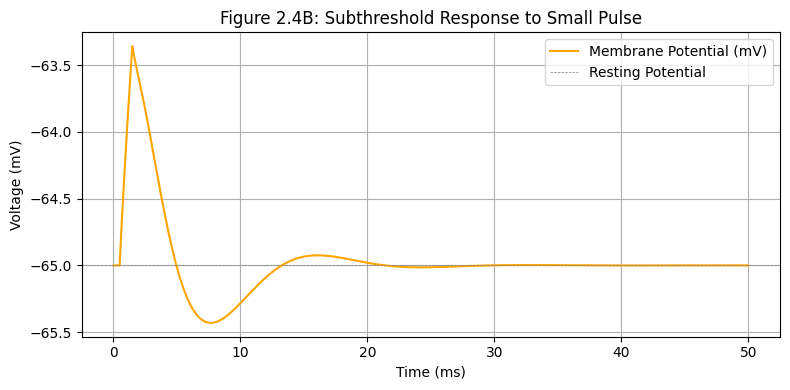

In [ ]:
# Create a new stimulus: a smaller pulse that does NOT reach threshold
I_ext_subthreshold = np.zeros_like(time)
I_ext_subthreshold[(time >= 0.5) & (time < 1.5)] = 2  # smaller pulse

# Reinitialize variables
u2 = np.zeros_like(time)
m2 = np.zeros_like(time)
h2 = np.zeros_like(time)
n2 = np.zeros_like(time)

# Initial conditions at rest
u2[0] = 0.0
m2[0] = alpha_m(u2[0]) / (alpha_m(u2[0]) + beta_m(u2[0]))
h2[0] = alpha_h(u2[0]) / (alpha_h(u2[0]) + beta_h(u2[0]))
n2[0] = alpha_n(u2[0]) / (alpha_n(u2[0]) + beta_n(u2[0]))

# Euler integration
for i in range(1, len(time)):
    um = u2[i-1]
    am, bm = alpha_m(um), beta_m(um)
    ah, bh = alpha_h(um), beta_h(um)
    an, bn = alpha_n(um), beta_n(um)

    m2[i] = m2[i-1] + dt * (am * (1 - m2[i-1]) - bm * m2[i-1])
    h2[i] = h2[i-1] + dt * (ah * (1 - h2[i-1]) - bh * h2[i-1])
    n2[i] = n2[i-1] + dt * (an * (1 - n2[i-1]) - bn * n2[i-1])

    I_Na = g_Na * m2[i]**3 * h2[i] * (um - E_Na)
    I_K = g_K * n2[i]**4 * (um - E_K)
    I_L = g_L * (um - E_L)

    du = (I_ext_subthreshold[i] - I_Na - I_K - I_L) / C
    u2[i] = u2[i-1] + dt * du

# Shift resting potential for display
u2_shifted = u2 - 65

# Plotting
plt.figure(figsize=(8, 4))
plt.plot(time, u2_shifted, label='Membrane Potential (mV)', color='orange')
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (mV)')
plt.title('Figure 2.4B: Subthreshold Response to Small Pulse')
plt.axhline(-65, color='gray', linestyle='--', linewidth=0.5, label='Resting Potential')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Example: Mean Firing Rates and Gain Function

Now we explore **what happens under constant input**:

* Assume a **step current**:

  $$
  I(t) = I_0 \quad \text{for } t > 0
  $$
* If $I_0 > I_{\theta} \approx 6 \, \mu\text{A/cm}^2$, the neuron **fires regularly**.

## Outcome:

* You get **repetitive spiking** at a **constant frequency**.
* Define **firing rate**:

  $$
  \nu = \frac{1}{T}
  $$

  where $T$ is the interspike interval.

This forms the **gain function**, which tells you how firing rate depends on the input strength $I_0$.


### The Mean Firing Rate

A spike train under constant input shows regular, periodic action potentials. The Hodgkin–Huxley neuron fires consistently when the input exceeds threshold, producing evenly spaced spikes. The mean firing rate measures how often a neuron fires over time


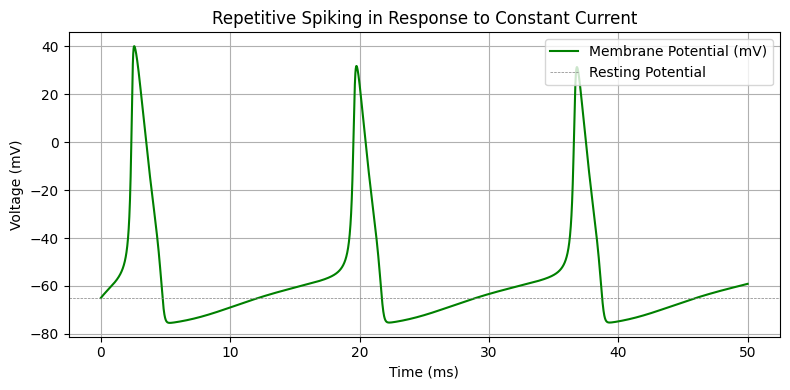

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Time parameters
dt = 0.01  # ms
T = 50.0   # total time in ms
time = np.arange(0, T, dt)

# Constant current stimulus above threshold
I_ext_constant = np.full_like(time, 7.0)

# Hodgkin-Huxley parameters
g_Na = 120.0
g_K = 36.0
g_L = 0.3
E_Na = 115.0
E_K = -12.0
E_L = 10.6
C = 1.0

# Rate functions
def alpha_m(u): return (2.5 - 0.1 * u) / (np.exp(2.5 - 0.1 * u) - 1)
def beta_m(u): return 4 * np.exp(-u / 18)
def alpha_h(u): return 0.07 * np.exp(-u / 20)
def beta_h(u): return 1 / (np.exp(3 - 0.1 * u) + 1)
def alpha_n(u): return (0.1 - 0.01 * u) / (np.exp(1 - 0.1 * u) - 1)
def beta_n(u): return 0.125 * np.exp(-u / 80)

# Initialize state variables
u = np.zeros_like(time)
m = np.zeros_like(time)
h = np.zeros_like(time)
n = np.zeros_like(time)

# Initial conditions
u[0] = 0.0
m[0] = alpha_m(u[0]) / (alpha_m(u[0]) + beta_m(u[0]))
h[0] = alpha_h(u[0]) / (alpha_h(u[0]) + beta_h(u[0]))
n[0] = alpha_n(u[0]) / (alpha_n(u[0]) + beta_n(u[0]))

# Euler integration
for i in range(1, len(time)):
    um = u[i-1]
    am, bm = alpha_m(um), beta_m(um)
    ah, bh = alpha_h(um), beta_h(um)
    an, bn = alpha_n(um), beta_n(um)

    m[i] = m[i-1] + dt * (am * (1 - m[i-1]) - bm * m[i-1])
    h[i] = h[i-1] + dt * (ah * (1 - h[i-1]) - bh * h[i-1])
    n[i] = n[i-1] + dt * (an * (1 - n[i-1]) - bn * n[i-1])

    I_Na = g_Na * m[i]**3 * h[i] * (um - E_Na)
    I_K = g_K * n[i]**4 * (um - E_K)
    I_L = g_L * (um - E_L)

    du = (I_ext_constant[i] - I_Na - I_K - I_L) / C
    u[i] = u[i-1] + dt * du

# Shift for display
u_shifted = u - 65

# Plotting
plt.figure(figsize=(8, 4))
plt.plot(time, u_shifted, label='Membrane Potential (mV)', color='green')
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (mV)')
plt.title('Repetitive Spiking in Response to Constant Current')
plt.axhline(-65, color='gray', linestyle='--', linewidth=0.5, label='Resting Potential')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### The Gain Function  

* The **Firing Rate** is a Discontinuous Function of Input Current

* The **gain function** (firing rate \$\nu\$ vs input \$I\_0\$) is **not smooth**.
* Instead, it shows **step-like increases** and **plateaus** — the hallmark of **nonlinear excitability**.
* At some \$I\_0\$ values, the neuron fires at regular intervals (stable frequency).
* Between those points, small changes in \$I\_0\$ might:

  * Do nothing (no new spikes appear),
  * Or suddenly cause the firing rate to jump up a notch.


The Discontinuous nature is due to the following:

1. **Refractory periods** and **spike timing stability**:

   * The neuron has built-in timing constraints.
2. **Bifurcation behavior**:

   * You’re seeing discrete changes in how many spikes fit into the time window as \$I\_0\$ increases.
3. **Simulation duration**:

   * If \$T\$ isn't very long, you only get coarse resolution of the underlying oscillatory dynamics.
   * That’s okay — your plot already captures the important features.

The **sudden drop-off** in firing rate near high input currents (like around $I_0 \approx 75 \mu\text{A}/\text{cm}^2$) is a real and fascinating phenomenon in Hodgkin–Huxley neurons.

Depolarization Block (also called *depolarization-induced inactivation*)

* At **very high input currents**, the membrane potential gets pushed up and **held too close to the sodium reversal potential**.
* This sustained depolarization:

  * **Inactivates the sodium channels** (the $h$ gate closes),
  * **Prevents recovery of excitability** — the neuron gets "stuck".

**No spikes can fire**, because:

* Na⁺ channels can’t reopen (since $h \approx 0$),
* K⁺ channels stay open too long,
* The membrane never repolarizes enough to reset.

Let’s rewrite the sodium current:

$$
I_{\text{Na}} = g_{\text{Na}} \, m^3 h (u - E_{\text{Na}})
$$

* At high $u$, the inactivation variable $h$ drops to near 0.
* Even if activation $m$ is high, **no current can flow** → **no spike**.
* This matches real neurons.
* In labs, this is seen when you inject very large constant currents into biological neurons — they **stop firing**.

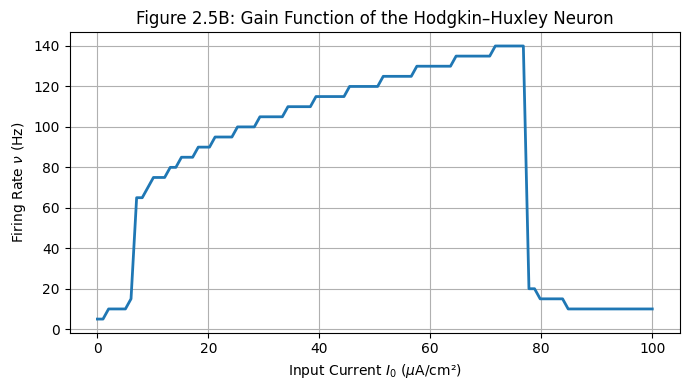

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to compute firing rate for a given input current
def compute_firing_rate(I_amp, T=200.0, dt=0.01):
    time = np.arange(0, T, dt)
    I_ext = np.full_like(time, I_amp)

    u = np.zeros_like(time)
    m = np.zeros_like(time)
    h = np.zeros_like(time)
    n = np.zeros_like(time)

    # Initial conditions
    u[0] = 0.0
    m[0] = alpha_m(u[0]) / (alpha_m(u[0]) + beta_m(u[0]))
    h[0] = alpha_h(u[0]) / (alpha_h(u[0]) + beta_h(u[0]))
    n[0] = alpha_n(u[0]) / (alpha_n(u[0]) + beta_n(u[0]))

    spike_count = 0
    threshold = 0.0
    above_threshold = False

    for i in range(1, len(time)):
        um = u[i-1]
        am, bm = alpha_m(um), beta_m(um)
        ah, bh = alpha_h(um), beta_h(um)
        an, bn = alpha_n(um), beta_n(um)

        m[i] = m[i-1] + dt * (am * (1 - m[i-1]) - bm * m[i-1])
        h[i] = h[i-1] + dt * (ah * (1 - h[i-1]) - bh * h[i-1])
        n[i] = n[i-1] + dt * (an * (1 - n[i-1]) - bn * n[i-1])

        I_Na = g_Na * m[i]**3 * h[i] * (um - E_Na)
        I_K = g_K * n[i]**4 * (um - E_K)
        I_L = g_L * (um - E_L)

        du = (I_ext[i] - I_Na - I_K - I_L) / C
        u[i] = u[i-1] + dt * du

        # Spike detection
        if u[i] > threshold and not above_threshold:
            spike_count += 1
            above_threshold = True
        elif u[i] <= threshold:
            above_threshold = False

    firing_rate = spike_count / (T / 1000.0)  # Hz
    return firing_rate

# Sweep input current values and compute firing rates
I_vals = np.linspace(0, 100, 100)
firing_rates = [compute_firing_rate(I) for I in I_vals]

# Plotting the gain function
plt.figure(figsize=(7, 4))
plt.plot(I_vals, firing_rates, linewidth=2)
plt.xlabel('Input Current $I_0$ ($\\mu$A/cm²)')
plt.ylabel('Firing Rate $\\nu$ (Hz)')
plt.title('Figure 2.5B: Gain Function of the Hodgkin–Huxley Neuron')
plt.grid(True)
plt.tight_layout()
plt.show()


## Example: Step Current Input

Define a more general **step function** input:

$$
I(t) = I_1 + \Delta I \cdot \Theta(t)
$$

* $\Theta(t)$: Heaviside step function (0 for $t < 0$, 1 for $t \ge 0$)
* At $t = 0$, the input **jumps from $I_1$ to $I_1 + \Delta I$**

> This helps test **transient behavior** — like how the neuron reacts to sudden increases in stimulation.

## Summary of Key Takeaways:

| Type of Input      | Response Behavior                                |
| ------------------ | ------------------------------------------------ |
| **Pulse**          | May trigger spike if above threshold             |
| **Constant**       | Fires regularly if current > threshold           |
| **Step**           | Triggers transient response or sustained spiking |
| **Time-dependent** | Rich dynamics, e.g., oscillations or bursts      |


example 3

# Dynamical Behavior

Neurons respond to input in a range of ways depending on both the size and timing of the stimulation. With weak or slowly varying input, the neuron may remain completely inactive, showing no electrical output.

In some cases, a sudden change in input can trigger a **single spike**, even if the final input level isn’t strong enough to sustain activity—this is similar to a **critically damped response**, where the system returns smoothly to rest after a brief disturbance.

With slightly different conditions, the response may resemble an **overdamped system**, slowly settling back to rest without spiking. For stronger and sustained input, the neuron may enter an **oscillatory regime**, producing a regular train of spikes—this is the **repetitive firing** phase.

These outcomes aren’t determined by a single voltage threshold but arise from the system’s overall dynamics, which depend on how quickly and how far the input changes. This reflects the neuron's inherently nonlinear and time-sensitive behavior.

## Action Potential

* The neuron is stimulated by a **short, strong pulse** just before $t = 0$.
* The plot shows:

  * A **sharp spike** (the action potential, \~100 mV)
  * Followed by a **relative refractory period** where voltage drops below resting potential

> $\Delta u(t) = u(t) - u_{\text{rest}}$ gives us the deviation from rest.

## Threshold Behavior

* A **smaller pulse** is applied.
* The neuron **doesn’t spike** — voltage goes up slightly but drops back down.

> This illustrates the **all-or-nothing threshold**: a stimulus must exceed a certain level to trigger a full action potential.

## Spike Train

* For a **constant input** current $I_0 = 7.0 \, \mu\text{A/cm}^2$, the neuron fires **repeated action potentials**.
* These spikes are **regularly spaced** (like a metronome).

## Gain Function

* Plots **firing rate $\nu$** (spikes/sec) vs. **input strength $I_0$**
* There’s a clear **threshold**:

  * Below \~6 μA/cm² → **no spikes**
  * Above that → **firing rate increases** with $I_0$

> This is the **input-output relationship** or **f-I curve** — a hallmark of neuron responsiveness.

## Heaviside Step Input

* Defined as:

  $$
  \Theta(t) = \begin{cases}
  0 & \text{for } t \leq 0 \\
  1 & \text{for } t > 0
  \end{cases}
  $$

At $t = 0$, the input **jumps** from $I_1$ to $I_2 = I_1 + \Delta I$.

> This raises  a key question:
> Does spiking after $t > 0$ depend only on $I_2$, or also on the **jump size $\Delta I$**?

## The Answer:

* A **large step** $\Delta I$ can **trigger a spike**, **even if** the final input $I_2$ is subthreshold!
* This is known as **inhibitory rebound** or **post-inhibitory excitation**.

  * If the neuron was hyperpolarized before ($I_1 < 0$), a sudden release can cause a **rebound spike**.
  * Fig. 2.6B will show this (you’ll likely see this on the next page).

### **No unique "threshold"**

* There is **no sharp border** between spiking and non-spiking.
* A spike depends on both:

  * Final current $I_2$
  * Jump size $\Delta I$

> This challenges the **idea of a strict voltage threshold**. Instead, it’s **dynamical**. The concept of a threshold itself is questionable from a mathematical point of view.

That’s because the transition is **smooth** (no discontinuity), though in practice we often **treat it as a threshold**.

### Practical Example:

If you set:

* $I_1 = 0$ (no input)
* $I_2 = 4$ (subthreshold)

→ **No spike** unless $\Delta I$ is big enough (fast jump)

But if:

* $I_1 = -2$ (inhibitory input)
* $I_2 = 4$ → $\Delta I = 6$

→ You might get a **rebound spike**!

### Key Concepts So Far:

| Concept              | Description                                          |
| -------------------- | ---------------------------------------------------- |
| **Action potential** | A spike triggered by strong depolarization           |
| **Threshold**        | Minimum stimulus needed to cause spiking             |
| **Spike train**      | Series of regularly spaced spikes for constant input |
| **Gain function**    | Relationship between input current and firing rate   |
| **Rebound spike**    | Spike after sudden release from hyperpolarization    |



---

# Irregular Spiking and Refractoriness
The two key phenomena in real neuron dynamics that go beyond just regular pulse trains. Let’s break this down.

## An Irregular Spike Train

* The model receives a **time-dependent input** current.
* Action potentials occur at **irregular intervals**, unlike the clean periodic firing we saw earlier.

> This simulates **real-world neural input** conditions — noisy, variable, and not perfectly rhythmic.

## Refractoriness

* A **short current pulse** at $t = 20 \, \text{ms}$ triggers a spike.
* The **same pulse** is applied again at $t = 25, 27.5, 30, 32.5 \, \text{ms}$
* But: none of these cause a second spike!

> This demonstrates **neuronal refractoriness** — a period during which the neuron is **less excitable**.

## What is Refractoriness?

Two key reasons a neuron may **not spike again immediately** after one spike:

### 1. Hyperpolarization

* After a spike, the membrane potential **dips below resting potential** (undershoot)
* This is due to **potassium current $K^+$** still flowing outward
* A stimulus now must **overcome this dip**, needing **more input current** to reach threshold again

### 2. Reduced Sodium Conductance

* Right after a spike, **Na⁺ channels are inactivated**
* They **don’t reopen immediately**, reducing the membrane’s ability to depolarize
* So even if voltage climbs a bit, **Na⁺ influx isn’t available** to drive another spike

## Summary

* They draw random values from a Gaussian distribution every 2 ms to generate noisy input current
* These are **linearly interpolated** to produce a **continuous input waveform**
* The result is applied to the HH model to simulate **realistic, time-varying drive**
* The **irregular spiking** pattern (Fig. 2.7A) mimics what happens in biological neurons


## Takeaway on Refractoriness

* It’s not just “the neuron is resting”
* It’s **dynamically less excitable** due to:

  1. **Voltage undershoot** (hyperpolarization)
  2. **Temporary inactivation of Na⁺ channels**
* This defines a **minimum inter-spike interval** and limits firing frequency

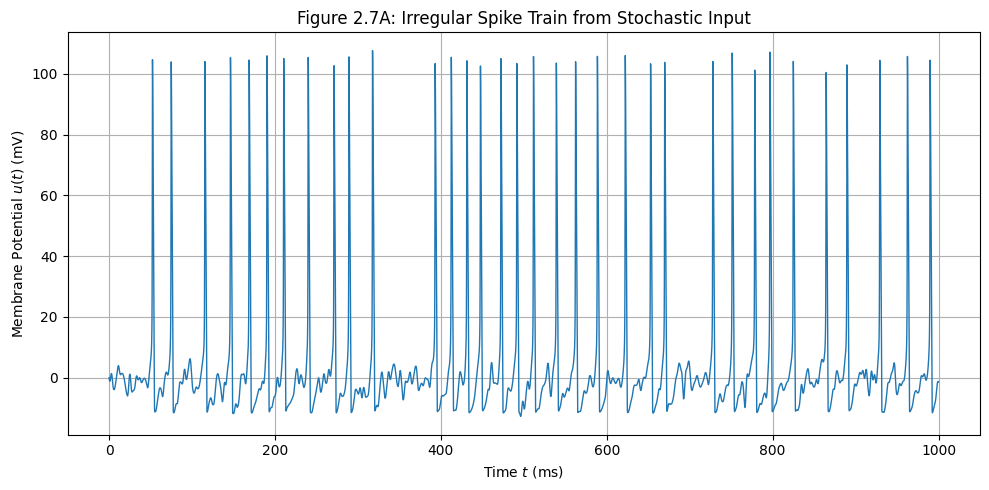

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Hodgkin-Huxley model parameters
C_m = 1.0  # membrane capacitance, uF/cm^2
g_Na = 120.0  # maximum conductances, mS/cm^2
g_K = 36.0
g_L = 0.3
E_Na = 115.0  # reversal potentials, mV
E_K = -12.0
E_L = 10.6

# Time parameters
dt = 0.01  # ms
T = 1000.0  # total time to simulate (ms)
time = np.arange(0, T + dt, dt)

# Stimulus: time-varying current based on Gaussian noise and interpolation
stim_step = 2.0  # ms
stim_times = np.arange(0, T + stim_step, stim_step)
stim_values = np.random.normal(0, 3.0, len(stim_times))
I = np.interp(time, stim_times, stim_values)

# Gating kinetics
def alpha_m(u): return (2.5 - 0.1 * u) / (np.exp(2.5 - 0.1 * u) - 1)
def beta_m(u): return 4.0 * np.exp(-u / 18)
def alpha_h(u): return 0.07 * np.exp(-u / 20)
def beta_h(u): return 1 / (np.exp(3.0 - 0.1 * u) + 1)
def alpha_n(u): return (0.1 - 0.01 * u) / (np.exp(1 - 0.1 * u) - 1)
def beta_n(u): return 0.125 * np.exp(-u / 80)

# Initialize state variables
u = np.zeros_like(time)
m = np.zeros_like(time)
h = np.zeros_like(time)
n = np.zeros_like(time)

u[0] = 0.0  # mV
m[0] = alpha_m(u[0]) / (alpha_m(u[0]) + beta_m(u[0]))
h[0] = alpha_h(u[0]) / (alpha_h(u[0]) + beta_h(u[0]))
n[0] = alpha_n(u[0]) / (alpha_n(u[0]) + beta_n(u[0]))

# Simulate HH model
for i in range(1, len(time)):
    V = u[i - 1]
    a_m = alpha_m(V)
    b_m = beta_m(V)
    a_h = alpha_h(V)
    b_h = beta_h(V)
    a_n = alpha_n(V)
    b_n = beta_n(V)

    m[i] = m[i - 1] + dt * (a_m * (1 - m[i - 1]) - b_m * m[i - 1])
    h[i] = h[i - 1] + dt * (a_h * (1 - h[i - 1]) - b_h * h[i - 1])
    n[i] = n[i - 1] + dt * (a_n * (1 - n[i - 1]) - b_n * n[i - 1])

    I_Na = g_Na * m[i] ** 3 * h[i] * (V - E_Na)
    I_K = g_K * n[i] ** 4 * (V - E_K)
    I_L = g_L * (V - E_L)

    du = (I[i] - I_Na - I_K - I_L) / C_m
    u[i] = u[i - 1] + dt * du

# Plot Figure 2.7A reproduction
plt.figure(figsize=(10, 5))
plt.plot(time, u, lw=1)
plt.title("Irregular Spike Train from Stochastic Input")
plt.xlabel("Time $t$ (ms)")
plt.ylabel("Membrane Potential $u(t)$ (mV)")
plt.grid(True)
plt.tight_layout()
plt.show()
